# Mindestanforderungen
- Allgemeines: Die Verarbeitung von Bildern muss in Echtzeit stattfinden --> Ziel: > 20 FPS für reine Verarbeitung ohne Anzeige)  Prozessor, Grafikkarte, Arbeitsspeicher
- Allgemeines: Beschleunigen Sie die Verarbeitung durch weitere Maßnahmen (bspw. Erkennung der Spurmarkierung in den ersten Frames, Tracking der Spurmarkierung in weiteren Frames solange, bis sich Spurmarkierungspositionen zu stark ändern)  mind. eine Maßnahme im Projekt verwenden
- Allgemeines: relevante Spurmarkierungen werden in den Udacity-Bildern und im Video „project_video“ durchgehend erkannt
* * *
Imports

In [7]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import glob

## Segmentierung des Bildes
 schränken Sie das Bild auf den Bereich ein, in dem sich die Spurmarkierungen befinden

In [8]:
# TODO: Implementieren Sie hier Ihre Lösung für die Segmentierung des Bildes
# Lade das Bild
image = cv.imread('img/Udacity/image002.jpg')

# Definiere den Bereich für den Himmel und die Büsche (als Beispiel)
lower_blue = np.array([90, 80, 80])  # Untere Grenze für Blautöne
upper_blue = np.array([130, 255, 255])  # Obere Grenze für Blautöne

# Wandle das Bild in den HSV-Farbraum um
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Erstelle eine Maske, um den Bereich außerhalb des gewünschten Bereichs zu maskieren
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Wend die Maske auf das ursprüngliche Bild an
result = cv.bitwise_and(image, image, mask=mask)

# Zeige das Ergebnisbild
cv.imshow('Result', result)

## Vorverarbeitung
Führen Sie eine Kamerakalibrierung (für Udacity-Bildquellen) und die Perspektivtransformation durch


Kalibriere Bild:./img/Udacity/calib/calibration5.jpg
Kalibrierungspunkte gefunden: True
Kalibriere Bild:./img/Udacity/calib/calibration4.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration6.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration7.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration3.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration2.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration1.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration20.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration19.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration18.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacity/calib/calibration15.jpg
Keine Kalibrierungspunkte gefunden
Kalibriere Bild:./img/Udacit

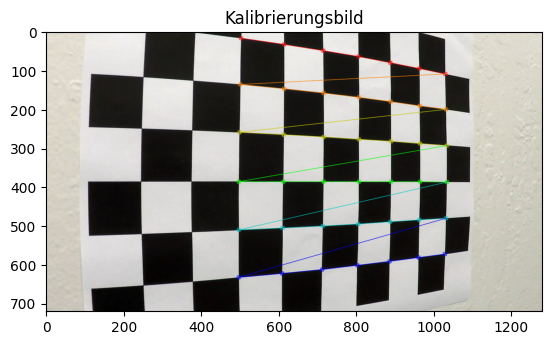

In [9]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
result_images = []
images = glob.glob('./img/Udacity/calib/*.jpg')
for fname in images:
    print("Kalibriere Bild:" + fname)
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        result_images.append(img)
        print("Kalibrierungspunkte gefunden: " + str(ret))
    else:
        print("Keine Kalibrierungspunkte gefunden")

for img in result_images:
    plt.figure()
    plt.title('Kalibrierungsbild')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    
# ToDo: weitere Kalibration in https://docs.opencv.org/4.5.3/dc/dbb/tutorial_py_calibration.html

## Farbräume, Histogramme
erkennen Sie die Spurmarkierungen in den Farben der angegebenen Quellen
Falls weitere Spurmarkierungen auf dem Bild gefunden werden, müssen die der eigenen Fahrspur priorisiert werden

In [10]:
# TODO: Implementieren Sie hier Ihre Lösung für die Erkennung der Spurmarkierungen

## Curve / Polynom Fitting
- Erkennen Sie die Krümmung der Fahrspur und geben Sie diese im Ausgabebild aus
- Validierung des Verfahrens: Umrechnung auf Straßenkrümmung, sodass Simulation erfolgreich bestanden wird

In [11]:
# TODO: Implementieren Sie hier Ihre Lösung für die Erkennung der Spurmarkierungen

## Allgemeines: Udacity-Bilder und Video
 relevante Spurmarkierungen werden in den Udacity-Bildern und im Video „project_video“ durchgehend erkannt

In [12]:
# TODO: Implementieren Sie hier Ihre Lösung für die Erkennung der Spurmarkierungen